In [1]:
#load packages
import time

start = time.clock()
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random


import xarray as xr
import dask

#import gcsfs


# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)


#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
#from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline



sns.set_style('whitegrid')
end = time.clock()
clocker = end - start
print("TIME ELAPSED:%d" %clocker)
cwd = os.getcwd()


Python version: 3.6.6 | packaged by conda-forge | (default, Jul 26 2018, 09:55:02) 
[GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.53)]
pandas version: 0.24.2
matplotlib version: 3.0.3
NumPy version: 1.16.2
SciPy version: 1.2.1
IPython version: 7.2.0
scikit-learn version: 0.20.3
-------------------------
TIME ELAPSED:3


In [2]:
cwd

'/Users/EduardoP'

In [3]:
print(os.listdir("../EduardoP/Desktop/Task-2/"))


['.DS_Store', 'ecoli.data(new).numbers', 'ecoli.data.csv', 'A probabilistic classification system for predicting the cellular localization sites of proteins.pdf', 'yeast.data', 'ecoli.data(clean).csv', 'yeast.names', 'ecoli.data(new).csv', 'yeast.data.csv', 'ecoli.names', 'yeast.data(clean)copy.csv', 'ecoli.data(old).csv', 'yeast.data(clean)copy.numbers', 'yeast.data(clean).csv']


In [4]:
ecoli_df = pd.read_csv('../EduardoP/Desktop/Task-2/ecoli.data(clean).csv', skiprows=1)
print(list(ecoli_df.columns))
e_cols = list(ecoli_df.columns)

yeast_df = pd.read_csv('../EduardoP/Desktop/Task-2/yeast.data(clean).csv', skiprows=0)
y_cols = list(yeast_df.columns)




['SEQUENCE_NAME', 'MCG', 'GVH', 'LIP', 'CHG', 'AAC', 'ALM1', 'ALM2', 'CLASS']


In [5]:
print(e_cols)
print(y_cols)

['SEQUENCE_NAME', 'MCG', 'GVH', 'LIP', 'CHG', 'AAC', 'ALM1', 'ALM2', 'CLASS']
['SEQUENCE_NAME', 'MCQ', 'GVH', 'ALM', 'MIT', 'ERL', 'POX', 'VAC', 'NUC', 'CLASS']


In [6]:
print(ecoli_df.head(10))
print("-"*10)
print(yeast_df.head(10))


  SEQUENCE_NAME   MCG   GVH   LIP  CHG   AAC  ALM1  ALM2 CLASS
0  AAT_ECOLI     0.49  0.29  0.48  0.5  0.56  0.24  0.35    cp
1  ACEA_ECOLI    0.07  0.40  0.48  0.5  0.54  0.35  0.44    cp
2  ACEK_ECOLI    0.56  0.40  0.48  0.5  0.49  0.37  0.46    cp
3  ACKA_ECOLI    0.59  0.49  0.48  0.5  0.52  0.45  0.36    cp
4  ADI_ECOLI     0.23  0.32  0.48  0.5  0.55  0.25  0.35    cp
5  ALKH_ECOLI    0.67  0.39  0.48  0.5  0.36  0.38  0.46    cp
6  AMPD_ECOLI    0.29  0.28  0.48  0.5  0.44  0.23  0.34    cp
7    AMY2_ECOLI  0.21  0.34  0.48  0.5  0.51  0.28  0.39    cp
8  APT_ECOLI     0.20  0.44  0.48  0.5  0.46  0.51  0.57    cp
9  ARAC_ECOLI    0.42  0.40  0.48  0.5  0.56  0.18  0.30    cp
----------
  SEQUENCE_NAME   MCQ   GVH   ALM   MIT  ERL  POX   VAC   NUC CLASS
0  ADT1_YEAST    0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22   MIT
1  ADT2_YEAST    0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22   MIT
2  ADT3_YEAST    0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22   MIT
3  AAR2_YEAST    0.58  0

In [7]:
print(ecoli_df.tail(10))
print("-"*10)
print(yeast_df.tail(10))


    SEQUENCE_NAME   MCG   GVH   LIP  CHG   AAC  ALM1  ALM2 CLASS
326  SUBI_ECOLI    0.62  0.83  0.48  0.5  0.46  0.36  0.40    pp
327  TBPA_ECOLI    0.56  0.54  0.48  0.5  0.43  0.37  0.30    pp
328  TESA_ECOLI    0.69  0.66  0.48  0.5  0.41  0.50  0.25    pp
329  TOLB_ECOLI    0.69  0.65  0.48  0.5  0.63  0.48  0.41    pp
330  TORA_ECOLI    0.43  0.59  0.48  0.5  0.52  0.49  0.56    pp
331  TREA_ECOLI    0.74  0.56  0.48  0.5  0.47  0.68  0.30    pp
332  UGPB_ECOLI    0.71  0.57  0.48  0.5  0.48  0.35  0.32    pp
333  USHA_ECOLI    0.61  0.60  0.48  0.5  0.44  0.39  0.38    pp
334  XYLF_ECOLI    0.59  0.61  0.48  0.5  0.42  0.42  0.37    pp
335  YTFQ_ECOLI    0.74  0.74  0.48  0.5  0.31  0.53  0.52    pp
----------
     SEQUENCE_NAME   MCQ   GVH   ALM   MIT  ERL  POX   VAC   NUC CLASS
1474  YP52_YEAST    0.48  0.61  0.57  0.17  0.5  0.0  0.45  0.22   CYT
1475  YP53_YEAST    0.71  0.50  0.50  0.18  0.5  0.0  0.46  0.22   CYT
1476  YPT7_YEAST    0.61  0.48  0.54  0.25  0.5  0.0  0.50  0

In [8]:
print((ecoli_df.dtypes))
print((yeast_df.dtypes))

SEQUENCE_NAME     object
MCG              float64
GVH              float64
LIP              float64
CHG              float64
AAC              float64
ALM1             float64
ALM2             float64
CLASS             object
dtype: object
SEQUENCE_NAME     object
MCQ              float64
GVH              float64
ALM              float64
MIT              float64
ERL              float64
POX              float64
VAC              float64
NUC              float64
CLASS             object
dtype: object


In [9]:
ecoli_df.dtypes=='object'

SEQUENCE_NAME     True
MCG              False
GVH              False
LIP              False
CHG              False
AAC              False
ALM1             False
ALM2             False
CLASS             True
dtype: bool

In [10]:
print(ecoli_df.head(10))
print("-"*10)
print(yeast_df.head(10))


  SEQUENCE_NAME   MCG   GVH   LIP  CHG   AAC  ALM1  ALM2 CLASS
0  AAT_ECOLI     0.49  0.29  0.48  0.5  0.56  0.24  0.35    cp
1  ACEA_ECOLI    0.07  0.40  0.48  0.5  0.54  0.35  0.44    cp
2  ACEK_ECOLI    0.56  0.40  0.48  0.5  0.49  0.37  0.46    cp
3  ACKA_ECOLI    0.59  0.49  0.48  0.5  0.52  0.45  0.36    cp
4  ADI_ECOLI     0.23  0.32  0.48  0.5  0.55  0.25  0.35    cp
5  ALKH_ECOLI    0.67  0.39  0.48  0.5  0.36  0.38  0.46    cp
6  AMPD_ECOLI    0.29  0.28  0.48  0.5  0.44  0.23  0.34    cp
7    AMY2_ECOLI  0.21  0.34  0.48  0.5  0.51  0.28  0.39    cp
8  APT_ECOLI     0.20  0.44  0.48  0.5  0.46  0.51  0.57    cp
9  ARAC_ECOLI    0.42  0.40  0.48  0.5  0.56  0.18  0.30    cp
----------
  SEQUENCE_NAME   MCQ   GVH   ALM   MIT  ERL  POX   VAC   NUC CLASS
0  ADT1_YEAST    0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22   MIT
1  ADT2_YEAST    0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22   MIT
2  ADT3_YEAST    0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22   MIT
3  AAR2_YEAST    0.58  0

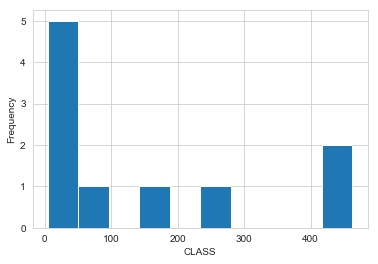

In [11]:
yeast_df['CLASS'].value_counts().plot.hist()
plt.xlabel('CLASS');


In [12]:
print(ecoli_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0))
print("-"*10)
print(yeast_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0))
print("-"*10)
print("8 different/unique e-coli bacteria classes, with 336 different/unique sequence names")
print("-"*10)
print("10 different yeast bacteria classes, with 1462 different/unique sequence names")

SEQUENCE_NAME    336
CLASS              8
dtype: int64
----------
SEQUENCE_NAME    1462
CLASS              10
dtype: int64
----------
8 different/unique e-coli bacteria classes, with 336 different/unique sequence names
----------
10 different yeast bacteria classes, with 1462 different/unique sequence names


In [13]:
# Age information into a separate dataframe
pox_data = yeast_df[['CLASS', 'POX']]
pox_data['POX'] = pox_data['POX'] / 0.25

# Bin the age data
pox_data['POX_BINNED'] = pd.cut(pox_data['POX'], bins = np.linspace(20, 70, num = 2))
pox_data.head(10)

,CLASS,POX,POX_BINNED
0,MIT,0.0,NaN
1,MIT,0.0,NaN
2,MIT,0.0,NaN
3,NUC,0.0,NaN
4,MIT,0.0,NaN
5,CYT,2.0,NaN
6,MIT,0.0,NaN
7,NUC,0.0,NaN
8,MIT,0.0,NaN
9,CYT,0.0,NaN


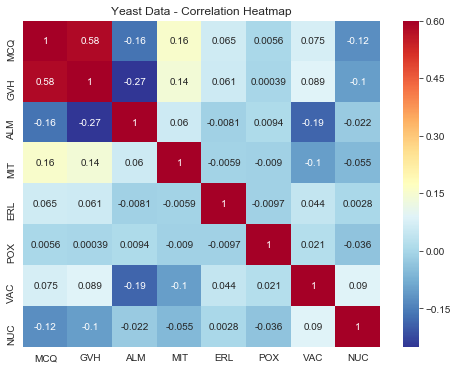

In [14]:
yeast_data_corrs = yeast_df.corr()
yeast_data_corrs

plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(yeast_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Yeast Data - Correlation Heatmap');

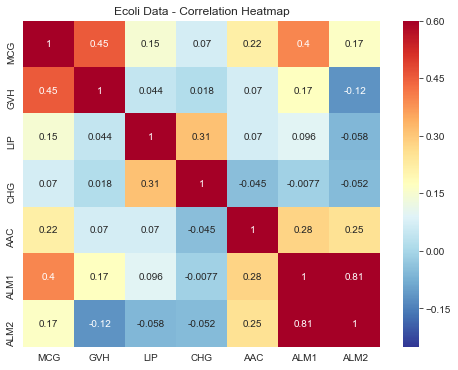

In [15]:
ecoli_data_corrs = ecoli_df.corr()
ecoli_data_corrs

plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ecoli_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Ecoli Data - Correlation Heatmap');

In [16]:
yeast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 10 columns):
SEQUENCE_NAME    1484 non-null object
MCQ              1484 non-null float64
GVH              1484 non-null float64
ALM              1484 non-null float64
MIT              1484 non-null float64
ERL              1484 non-null float64
POX              1484 non-null float64
VAC              1484 non-null float64
NUC              1484 non-null float64
CLASS            1484 non-null object
dtypes: float64(8), object(2)
memory usage: 116.0+ KB


In [17]:
yeast_df.SEQUENCE_NAME.unique().tolist()

['ADT1_YEAST  ',
 'ADT2_YEAST  ',
 'ADT3_YEAST  ',
 'AAR2_YEAST  ',
 'AATM_YEAST  ',
 'AATC_YEAST  ',
 'ABC1_YEAST  ',
 'BAF1_YEAST  ',
 'ABF2_YEAST  ',
 'ABP1_YEAST  ',
 'ACE1_YEAST  ',
 'ACE2_YEAST  ',
 'ACH1_YEAST  ',
 'ACON_YEAST  ',
 'ACR1_YEAST  ',
 'ACT_YEAST   ',
 'ACT2_YEAST  ',
 'ACT3_YEAST  ',
 'ACT5_YEAST  ',
 'ADA2_YEAST  ',
 'C1TC_YEAST  ',
 'PUR4_YEAST  ',
 'PUR3_YEAST  ',
 'ADH1_YEAST  ',
 'ADH2_YEAST  ',
 'ADH3_YEAST  ',
 'ADH4_YEAST  ',
 'KAD1_YEAST  ',
 'KAD2_YEAST  ',
 'ADP1_YEAST  ',
 'ADR1_YEAST  ',
 'AFG3_YEAST  ',
 'AFR1_YEAST  ',
 'RCS1_YEAST  ',
 'AGA1_YEAST  ',
 'AGA2_YEAST  ',
 'YMX1_YEAST  ',
 'SYAC_YEAST  ',
 'DHA1_YEAST  ',
 'DHA2_YEAST  ',
 'ALG1_YEAST  ',
 'ALG5_YEAST  ',
 'GPT_YEAST   ',
 'ALG8_YEAST  ',
 'MAN1_YEAST  ',
 'ANC1_YEAST  ',
 'ANP1_YEAST  ',
 'APE2_YEAST  ',
 'APE3_YEAST  ',
 'ALP1_YEAST  ',
 'ADB2_YEAST  ',
 'YHB9_YEAST  ',
 'APN1_YEAST  ',
 'ARD1_YEAST  ',
 'ARF1_YEAST  ',
 'ARF2_YEAST  ',
 'ASSY_YEAST  ',
 'OTC_YEAST   ',
 'ARLY_YEAST  

In [18]:
#Removign duplicate sequence names=>
duplicates = yeast_df.SEQUENCE_NAME.duplicated()
yeast_df=yeast_df[ ~duplicates]
#1462 rows × 10 columns

In [19]:
yeast_df
#1462 rows × 10 column

,SEQUENCE_NAME,MCQ,GVH,ALM,MIT,ERL,POX,VAC,NUC,CLASS
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
5,AATC_YEAST,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,CYT
6,ABC1_YEAST,0.50,0.54,0.48,0.65,0.5,0.0,0.53,0.22,MIT
7,BAF1_YEAST,0.48,0.45,0.59,0.20,0.5,0.0,0.58,0.34,NUC
8,ABF2_YEAST,0.55,0.50,0.66,0.36,0.5,0.0,0.49,0.22,MIT
9,ABP1_YEAST,0.40,0.39,0.60,0.15,0.5,0.0,0.58,0.30,CYT


In [20]:
ecoli_df = ecoli_df.drop(columns='SEQUENCE_NAME', axis=1)



In [21]:
yeast_df = yeast_df.drop(columns='SEQUENCE_NAME', axis=1)

In [22]:
yeast_df

,MCQ,GVH,ALM,MIT,ERL,POX,VAC,NUC,CLASS
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
5,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,CYT
6,0.50,0.54,0.48,0.65,0.5,0.0,0.53,0.22,MIT
7,0.48,0.45,0.59,0.20,0.5,0.0,0.58,0.34,NUC
8,0.55,0.50,0.66,0.36,0.5,0.0,0.49,0.22,MIT
9,0.40,0.39,0.60,0.15,0.5,0.0,0.58,0.30,CYT


In [23]:
ecoli_df['CLASS']

0      cp
1      cp
2      cp
3      cp
4      cp
5      cp
6      cp
7      cp
8      cp
9      cp
10     cp
11     cp
12     cp
13     cp
14     cp
15     cp
16     cp
17     cp
18     cp
19     cp
20     cp
21     cp
22     cp
23     cp
24     cp
25     cp
26     cp
27     cp
28     cp
29     cp
       ..
306    pp
307    pp
308    pp
309    pp
310    pp
311    pp
312    pp
313    pp
314    pp
315    pp
316    pp
317    pp
318    pp
319    pp
320    pp
321    pp
322    pp
323    pp
324    pp
325    pp
326    pp
327    pp
328    pp
329    pp
330    pp
331    pp
332    pp
333    pp
334    pp
335    pp
Name: CLASS, Length: 336, dtype: object

In [24]:
def encode_target(df, target_col):
    
        df_mod = df.copy()
        targets = df_mod[target_col].unique()
        map_to_int = {name: n for n, name in enumerate(targets)}
        df_mod["Target"] = df_mod[target_col].replace(map_to_int)
    
        return (df_mod, targets)
        
   #Add column to df with integers for the target.

    #Args
    #----
    #df -- pandas DataFrame.
    #target_column -- column to map to int, producing
    #                 new Target column.

    #Returns
    #-------
    #df_mod -- modified DataFrame.
    #targets -- list of target names.
    
    

In [25]:
# ecoli_df, targets  = encode_target(ecoli_df, 'CLASS')
# print ("* ecoli_df.head()", ecoli_df[["CLASS"]].head(),
#       sep="\n", end="\n\n")
# print("* df2.tail()", ecoli_df[["CLASS"]].tail(),
#       sep="\n", end="\n\n")
# print("* targets", targets, sep="\n", end="\n\n")


In [26]:
x,y = ecoli_df.loc[:,ecoli_df.columns != 'CLASS'], ecoli_df.loc[:,'CLASS']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

In [27]:
print('Train:', x_train.shape)
print('Test:', x_test.shape)



Train: (235, 7)
Test: (101, 7)


In [28]:
x_train

,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2
230,0.75,0.37,0.48,0.5,0.64,0.70,0.74
233,0.66,0.48,0.48,0.5,0.54,0.70,0.74
318,0.66,0.71,0.48,0.5,0.41,0.50,0.35
17,0.44,0.27,0.48,0.5,0.55,0.52,0.58
332,0.71,0.57,0.48,0.5,0.48,0.35,0.32
222,0.75,0.55,1.00,1.0,0.40,0.47,0.30
88,0.50,0.51,0.48,0.5,0.27,0.23,0.34
165,0.64,0.58,0.48,0.5,0.48,0.78,0.73
232,0.67,0.37,0.48,0.5,0.54,0.64,0.68
42,0.40,0.50,0.48,0.5,0.45,0.39,0.47


In [29]:
import sys
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(x_train)  
x_train = scaler.transform(x_train)  
# apply same transformation to test data
x_test = scaler.transform(x_test) 

In [30]:
print('Train:', x_train.shape)
print('Test:', x_test.shape)

Train: (235, 7)
Test: (101, 7)


In [31]:
x_train


array([[ 1.20483437, -0.90930463, -0.19955703, ...,  1.10262385,
         0.88966544,  1.12330619],
       [ 0.75100985, -0.13609658, -0.19955703, ...,  0.29237806,
         0.88966544,  1.12330619],
       [ 0.75100985,  1.48061116, -0.19955703, ..., -0.76094147,
        -0.0464052 , -0.71052018],
       ...,
       [-0.71131361,  0.0044867 , -0.19955703, ..., -0.6799169 ,
        -0.70165466, -0.24030829],
       [ 1.25525932,  1.48061116, -0.19955703, ..., -0.03172026,
         0.93646898,  1.17032737],
       [ 0.7005849 , -0.20638822, -0.19955703, ...,  0.69750095,
        -0.98247585, -0.47541423]])

In [32]:
features  = list(ecoli_df.columns[:7])
features

['MCG', 'GVH', 'LIP', 'CHG', 'AAC', 'ALM1', 'ALM2']

In [33]:
y_train

230      imU
233      imU
318       pp
17        cp
332       pp
222      imL
88        cp
165       im
232      imU
42        cp
284       pp
208       im
224      imU
161       im
189       im
5         cp
223      imL
173       im
38        cp
231      imU
324       pp
172       im
138       cp
67        cp
247      imU
310       pp
163       im
100       cp
34        cp
110       cp
       ...  
115       cp
314       pp
216       im
264       om
209       im
1         cp
22        cp
7         cp
141       cp
86        cp
241      imU
215       im
68        cp
50        cp
156       im
252      imU
254      imU
276       om
178       im
281      omL
237      imU
71        cp
129       cp
144       im
133       cp
203       im
255      imU
72        cp
235      imU
37        cp
Name: CLASS, Length: 235, dtype: object

In [34]:
from sklearn import tree
import numpy as np
features=list(ecoli_df.columns)

clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)
features_imp = clf.feature_importances_ # [ 1.,  0.,  0.]
score = clf.score(x_test, y_test) # 1.0

In [35]:
print(features_imp)
print(score)
# [0.36170172 0.10111032 0.03583616 0.         0.16605397 0.3159242
#  0.01937363]
# 0.8514851485148515

[0.35996432 0.10043838 0.03583616 0.         0.17395531 0.3159242
 0.01388162]
0.8514851485148515


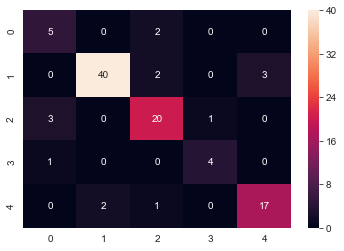

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

clf.fit(x_train, y_train)
dtree_predictions = clf.predict(x_test) 

cm = confusion_matrix(y_test, dtree_predictions) 
cm
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

In [37]:
print("Accuracy: %0.4f " % score)


Accuracy: 0.8515 


In [38]:
#Applying 10-Cross Validation to the Decision tRee
from sklearn.model_selection import cross_val_score

clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, x, y, cv=10)
clf.fit(x_train, y_train)
dtree_predictions = clf.predict(x_test) 
print(scores)


[0.78947368 0.78947368 0.82857143 0.85294118 0.85294118 0.875
 0.8125     0.83870968 0.80645161 0.70967742]


In [39]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.82 (+/- 0.09)


In [40]:
# def kde_target_plot(df, feature):
#     """Kernel density estimate plot of a feature colored
#     by value of the target."""
    
#     # Need to reset index for loc to workBU
#     df = df.reset_index()
#     plt.figure(figsize = (10, 6))
#     plt.style.use('fivethirtyeight')
    
#     # plot repaid loans
#     sns.kdeplot(df.loc[df['TARGET'] == 0, feature], label = 'target == 0')
#     # plot loans that were not repaid
#     sns.kdeplot(df.loc[df['TARGET'] == 1, feature], label = 'target == 1')
    
#     # Label the plots
#     plt.title('Distribution of Feature by Target Value')
#     plt.xlabel('%s' % feature); plt.ylabel('Density');
#     plt.show()

In [41]:
# kde_target_plot(ecoli_df, feature = 'CLASS')

In [42]:
print(score)

0.8514851485148515


In [43]:
from sklearn import tree
import numpy as np
features=list(ecoli_df.columns)

dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)
features_imp = dt.feature_importances_ # [ 1.,  0.,  0.]
score = dt.score(x_test, y_test) # 1.0

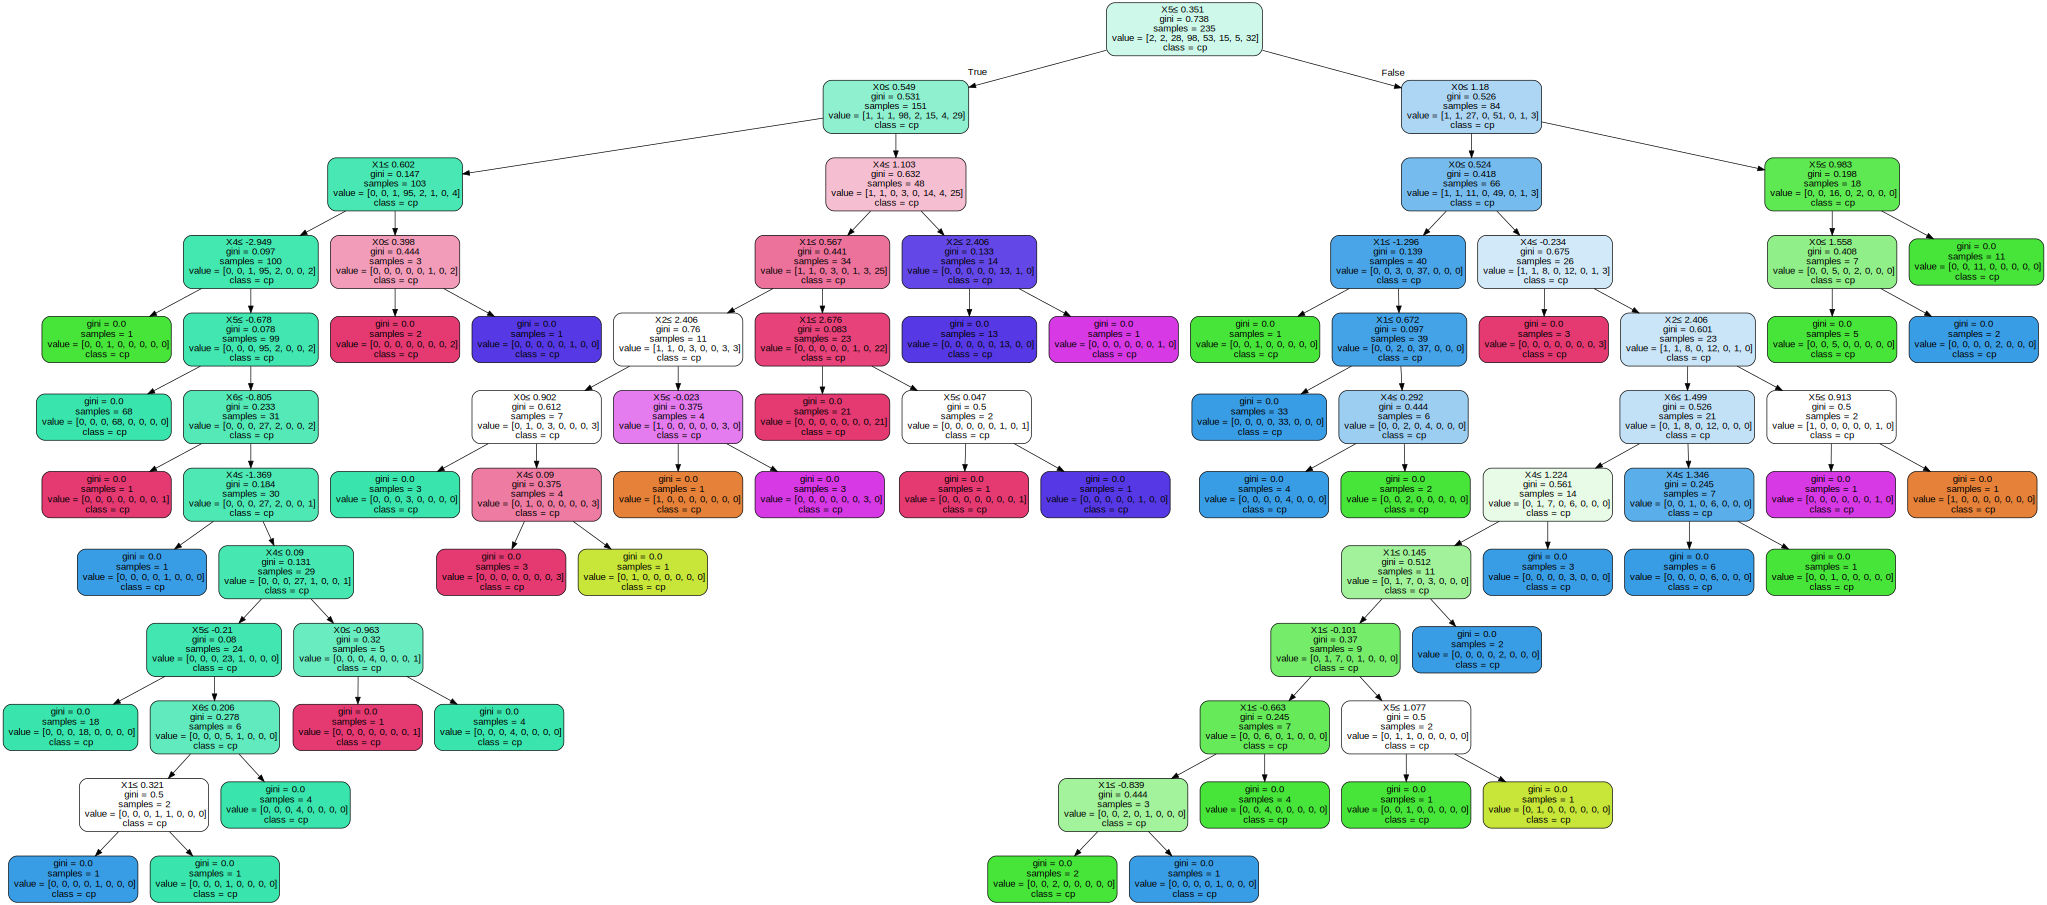

In [44]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
dot_data = tree.export_graphviz(
dt,
out_file=None,
class_names=y,
filled=True,
rounded=True,
special_characters=True)

graph = graphviz.Source(dot_data)
graph

In [45]:
def get_code(tree, feature_names, target_names,
             spacer_base="    "):
    """Produce psuedo-code for decision tree.

    Args
    ----
    tree -- scikit-leant DescisionTree.
    feature_names -- list of feature names.
    target_names -- list of target (class) names.
    spacer_base -- used for spacing code (default: "    ").

    Notes
    -----
    based on http://stackoverflow.com/a/30104792.
    """
    left      = tree.tree_.children_left
    right     = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features  = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth):
        spacer = spacer_base * depth
        if (threshold[node] != -2):
            print(spacer + "if ( " + features[node] + " <= " + \
                  str(threshold[node]) + " ) {")
            if left[node] != -1:
                    recurse(left, right, threshold, features,
                            left[node], depth+1)
            print(spacer + "}\n" + spacer +"else {")
            if right[node] != -1:
                    recurse(left, right, threshold, features,
                            right[node], depth+1)
            print(spacer + "}")
        else:
            target = value[node]
            for i, v in zip(np.nonzero(target)[1],
                            target[np.nonzero(target)]):
                target_name = target_names[i]
                target_count = int(v)
                print(spacer + "return " + str(target_name) + \
                      " ( " + str(target_count) + " examples )")

    recurse(left, right, threshold, features, 0, 0)

In [46]:
#get_code(dt, features, y)


In [47]:
#Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
#x,y = df_1.loc[:,df_1.columns != 'TARGET'], df_1.loc[:,'TARGET']

y_pred = dt.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
%time _ = print('Confusion matrix: \n',cm)
%time _ = print('Classification report: \n',classification_report(y_test,y_pred))

Confusion matrix: 
 [[ 5  0  2  0  0]
 [ 0 40  2  0  3]
 [ 3  0 20  0  1]
 [ 1  0  0  2  2]
 [ 0  2  1  1 16]]
CPU times: user 758 µs, sys: 680 µs, total: 1.44 ms
Wall time: 814 µs
Classification report: 
               precision    recall  f1-score   support

         imU       0.56      0.71      0.63         7
          cp       0.95      0.89      0.92        45
          im       0.80      0.83      0.82        24
          om       0.67      0.40      0.50         5
          pp       0.73      0.80      0.76        20

   micro avg       0.82      0.82      0.82       101
   macro avg       0.74      0.73      0.72       101
weighted avg       0.83      0.82      0.82       101

CPU times: user 9.74 ms, sys: 2.71 ms, total: 12.5 ms
Wall time: 11.9 ms


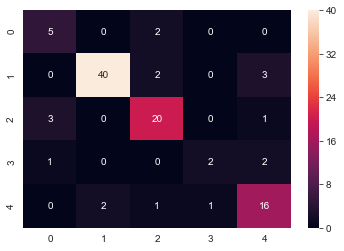

In [48]:
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()


In [49]:
#C-SUPPORT VECTOR classification with 10 cross validation

from sklearn.model_selection import cross_val_score

clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, x, y, cv=10)
print(scores)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

[0.78947368 0.78947368 0.82857143 0.85294118 0.85294118 0.875
 0.8125     0.83870968 0.80645161 0.70967742]
Accuracy: 0.8156 (+/- 0.0888)


In [50]:
#YEAST DF - FORM HERE DOWN:
#
print("-"*50)
yeast_df['CLASS']

--------------------------------------------------


0       MIT
1       MIT
2       MIT
3       NUC
4       MIT
5       CYT
6       MIT
7       NUC
8       MIT
9       CYT
10      NUC
11      NUC
12      CYT
13      MIT
14      MIT
15      CYT
16      CYT
17      NUC
18      NUC
19      NUC
20      CYT
21      CYT
22      CYT
23      CYT
24      CYT
25      MIT
26      CYT
27      CYT
28      MIT
29      ME1
       ... 
1454    NUC
1455    NUC
1456    ME1
1457    CYT
1458    MIT
1459    CYT
1460    MIT
1461    POX
1462    MIT
1463    NUC
1464    NUC
1465    NUC
1466    ME3
1467    CYT
1468    MIT
1469    MIT
1470    MIT
1471    MIT
1472    NUC
1473    CYT
1474    CYT
1475    CYT
1476    CYT
1477    CYT
1478    CYT
1479    ME2
1480    NUC
1481    ME2
1482    NUC
1483    CYT
Name: CLASS, Length: 1462, dtype: object

In [51]:
yeast_df.groupby(yeast_df['CLASS']).sum()

,MCQ,GVH,ALM,MIT,ERL,POX,VAC,NUC
CLASS,,,,,,,,
CYT,213.44,209.15,236.46,99.65,224.0,0.50,222.95,115.13
ERL,3.96,3.86,2.41,1.68,5.0,0.00,2.73,1.23
EXC,25.74,25.09,17.24,10.22,17.5,0.00,15.95,7.93
ME1,34.70,33.29,16.55,13.72,22.0,0.00,22.57,11.80
ME2,36.80,30.76,21.16,14.41,26.0,0.00,26.02,12.52
ME3,70.23,79.79,59.38,34.80,82.0,0.00,83.15,44.01
MIT,127.23,130.11,126.24,98.68,122.0,2.16,122.41,58.80
NUC,192.83,194.47,225.37,96.98,214.5,0.00,210.66,141.67
POX,10.42,10.16,10.13,4.95,10.0,8.47,10.06,4.68


In [52]:
#Yeast=>#Using the Yeast data for a DF 
#that uses all three: ME1, ME2 and ME3 (they are not grouped into ME3)

In [53]:
x,y = yeast_df.loc[:,yeast_df.columns != 'CLASS'], yeast_df.loc[:,'CLASS']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

In [54]:
print('Train:', x_train.shape)
print('Test:', x_test.shape)

Train: (1023, 8)
Test: (439, 8)


In [55]:
yeast_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1462 entries, 0 to 1483
Data columns (total 9 columns):
MCQ      1462 non-null float64
GVH      1462 non-null float64
ALM      1462 non-null float64
MIT      1462 non-null float64
ERL      1462 non-null float64
POX      1462 non-null float64
VAC      1462 non-null float64
NUC      1462 non-null float64
CLASS    1462 non-null object
dtypes: float64(8), object(1)
memory usage: 114.2+ KB


In [56]:
yeast_df.describe()

,MCQ,GVH,ALM,MIT,ERL,POX,VAC,NUC
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,0.500534,0.500999,0.498564,0.260684,0.504788,0.007613,0.500855,0.277216
std,0.137581,0.124022,0.085332,0.136743,0.048710,0.076245,0.056412,0.106469
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.450000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


In [57]:
print('Train:', x_train.shape)
print('Test:', x_test.shape)


Train: (1023, 8)
Test: (439, 8)


In [58]:
#Lists all the features of the yeast data-set (omitting the class feature)
features  = list(yeast_df.columns[:8])
features

['MCQ', 'GVH', 'ALM', 'MIT', 'ERL', 'POX', 'VAC', 'NUC']

In [59]:
import sys
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(x_train)  
x_train = scaler.transform(x_train)  
# apply same transformation to test data
x_test = scaler.transform(x_test) 

In [60]:
print('Train:', x_train.shape)
print('Test:', x_test.shape)

Train: (1023, 8)
Test: (439, 8)


In [61]:
from sklearn import tree
import numpy as np


dt1 = tree.DecisionTreeClassifier()
dt1.fit(x_train, y_train)
features_imp = dt1.feature_importances_ # [ 1.,  0.,  0.]
score = dt1.score(x_test, y_test) # 1.0

In [62]:
dt1

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [63]:
print(score)
# [0.2041696  0.16873305 0.2248508  0.17498626 0.00565521 0.0123259
#  0.11099855 0.09828063]
# 0.47085201793721976

0.489749430523918


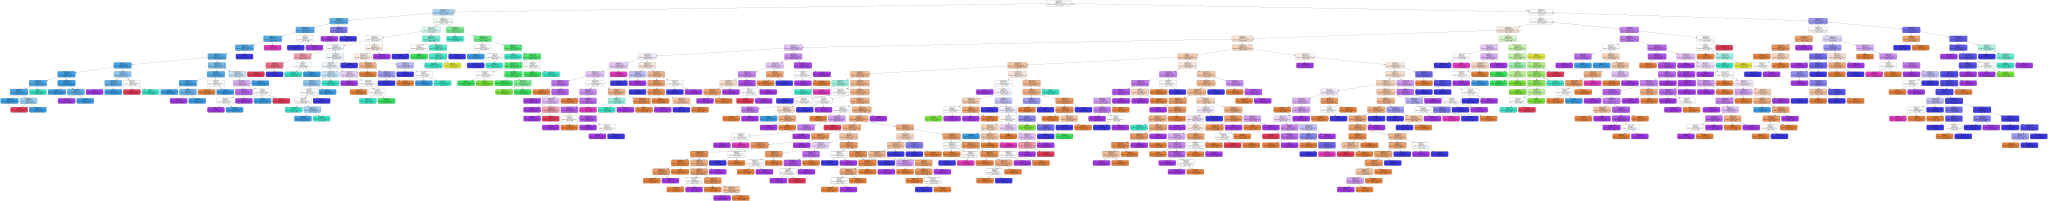

In [64]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
dot_data = tree.export_graphviz(
dt1,
out_file=None,
class_names=y,
filled=True,
rounded=True,
special_characters=True)

graph = graphviz.Source(dot_data)
graph

In [65]:
#get_code(dt1, features, y)

In [66]:
# Confusion matrix with random forest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
#x,y = df_1.loc[:,df_1.columns != 'TARGET'], df_1.loc[:,'TARGET']

y_pred = dt1.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
%time _ = print('Confusion matrix: \n',cm)
%time _ = print('Classification report: \n',classification_report(y_test,y_pred))

Confusion matrix: 
 [[65  0  0  0  1  2 16 53  4  7]
 [ 0  0  0  0  1  0  0  0  0  0]
 [ 2  0  6  1  5  0  4  0  0  0]
 [ 0  0  1  6  4  0  0  0  0  1]
 [ 3  0  0  2  4  0  2  0  0  0]
 [ 4  0  0  0  1 30  3  6  0  1]
 [ 8  0  2  1  2  3 40 10  0  0]
 [35  0  1  1  0  5 13 63  2  4]
 [ 1  0  0  0  1  0  2  2  0  0]
 [ 2  0  0  0  0  2  2  1  0  1]]
CPU times: user 789 µs, sys: 189 µs, total: 978 µs
Wall time: 910 µs
Classification report: 
               precision    recall  f1-score   support

         CYT       0.54      0.44      0.49       148
         ERL       0.00      0.00      0.00         1
         EXC       0.60      0.33      0.43        18
         ME1       0.55      0.50      0.52        12
         ME2       0.21      0.36      0.27        11
         ME3       0.71      0.67      0.69        45
         MIT       0.49      0.61      0.54        66
         NUC       0.47      0.51      0.49       124
         POX       0.00      0.00      0.00         6
         VAC  

/Users/EduardoP/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/EduardoP/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/EduardoP/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


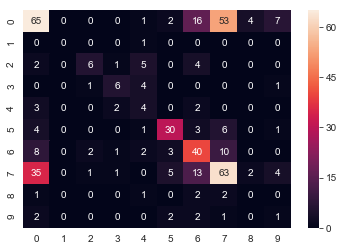

In [67]:
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

In [68]:
y_pred

array(['CYT', 'MIT', 'EXC', 'MIT', 'NUC', 'CYT', 'NUC', 'NUC', 'ME3',
       'NUC', 'NUC', 'MIT', 'MIT', 'NUC', 'MIT', 'CYT', 'ME2', 'CYT',
       'CYT', 'NUC', 'NUC', 'NUC', 'NUC', 'ME3', 'POX', 'VAC', 'NUC',
       'VAC', 'CYT', 'MIT', 'CYT', 'CYT', 'POX', 'CYT', 'NUC', 'NUC',
       'ME2', 'ME1', 'CYT', 'NUC', 'ME3', 'NUC', 'ME2', 'NUC', 'MIT',
       'CYT', 'NUC', 'MIT', 'ME3', 'VAC', 'MIT', 'ME3', 'NUC', 'NUC',
       'NUC', 'MIT', 'NUC', 'ME3', 'NUC', 'NUC', 'ME1', 'MIT', 'CYT',
       'VAC', 'MIT', 'ME3', 'POX', 'NUC', 'ME3', 'MIT', 'ME1', 'ME2',
       'MIT', 'CYT', 'ME2', 'MIT', 'MIT', 'CYT', 'NUC', 'NUC', 'NUC',
       'CYT', 'NUC', 'ME3', 'NUC', 'CYT', 'CYT', 'CYT', 'ME3', 'CYT',
       'NUC', 'CYT', 'MIT', 'CYT', 'VAC', 'MIT', 'CYT', 'NUC', 'NUC',
       'NUC', 'CYT', 'MIT', 'NUC', 'MIT', 'CYT', 'NUC', 'NUC', 'NUC',
       'NUC', 'NUC', 'CYT', 'ME3', 'CYT', 'NUC', 'NUC', 'CYT', 'MIT',
       'CYT', 'ME2', 'CYT', 'VAC', 'VAC', 'CYT', 'CYT', 'ME3', 'NUC',
       'ME3', 'CYT',

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.489749430523918

In [70]:
yeast_df = pd.read_csv('../EduardoP/Desktop/Task-2/yeast.data(clean)copy.csv', skiprows=0)
y_cols = list(yeast_df.columns)
#ME1, ME2 have been changed to ME3#
#this is the new yeast_df where ME1=ME2=ME3


In [71]:
yeast_df = yeast_df.drop(columns='SEQUENCE_NAME', axis=1)

In [72]:
yeast_df['CLASS']

0       MIT
1       MIT
2       MIT
3       NUC
4       MIT
5       CYT
6       MIT
7       NUC
8       MIT
9       CYT
10      NUC
11      NUC
12      CYT
13      MIT
14      MIT
15      CYT
16      CYT
17      NUC
18      NUC
19      NUC
20      CYT
21      CYT
22      CYT
23      CYT
24      CYT
25      MIT
26      CYT
27      CYT
28      MIT
29      ME3
       ... 
1454    NUC
1455    NUC
1456    ME3
1457    CYT
1458    MIT
1459    CYT
1460    MIT
1461    POX
1462    MIT
1463    NUC
1464    NUC
1465    NUC
1466    ME3
1467    CYT
1468    MIT
1469    MIT
1470    MIT
1471    MIT
1472    NUC
1473    CYT
1474    CYT
1475    CYT
1476    CYT
1477    CYT
1478    CYT
1479    ME3
1480    NUC
1481    ME3
1482    NUC
1483    CYT
Name: CLASS, Length: 1484, dtype: object

In [73]:
yeast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 9 columns):
MCQ      1484 non-null float64
GVH      1484 non-null float64
ALM      1484 non-null float64
MIT      1484 non-null float64
ERL      1484 non-null float64
POX      1484 non-null float64
VAC      1484 non-null float64
NUC      1484 non-null float64
CLASS    1484 non-null object
dtypes: float64(8), object(1)
memory usage: 104.4+ KB


In [74]:
print(yeast_df['CLASS'])

0       MIT
1       MIT
2       MIT
3       NUC
4       MIT
5       CYT
6       MIT
7       NUC
8       MIT
9       CYT
10      NUC
11      NUC
12      CYT
13      MIT
14      MIT
15      CYT
16      CYT
17      NUC
18      NUC
19      NUC
20      CYT
21      CYT
22      CYT
23      CYT
24      CYT
25      MIT
26      CYT
27      CYT
28      MIT
29      ME3
       ... 
1454    NUC
1455    NUC
1456    ME3
1457    CYT
1458    MIT
1459    CYT
1460    MIT
1461    POX
1462    MIT
1463    NUC
1464    NUC
1465    NUC
1466    ME3
1467    CYT
1468    MIT
1469    MIT
1470    MIT
1471    MIT
1472    NUC
1473    CYT
1474    CYT
1475    CYT
1476    CYT
1477    CYT
1478    CYT
1479    ME3
1480    NUC
1481    ME3
1482    NUC
1483    CYT
Name: CLASS, Length: 1484, dtype: object


In [75]:
x,y = yeast_df.loc[:,yeast_df.columns != 'CLASS'], yeast_df.loc[:,'CLASS']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

In [76]:
print('Train:', x_train.shape)
print('Test:', x_test.shape)

Train: (1038, 8)
Test: (446, 8)


In [77]:
x

,MCQ,GVH,ALM,MIT,ERL,POX,VAC,NUC
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22
5,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22
6,0.50,0.54,0.48,0.65,0.5,0.0,0.53,0.22
7,0.48,0.45,0.59,0.20,0.5,0.0,0.58,0.34
8,0.55,0.50,0.66,0.36,0.5,0.0,0.49,0.22
9,0.40,0.39,0.60,0.15,0.5,0.0,0.58,0.30


In [78]:
y

0       MIT
1       MIT
2       MIT
3       NUC
4       MIT
5       CYT
6       MIT
7       NUC
8       MIT
9       CYT
10      NUC
11      NUC
12      CYT
13      MIT
14      MIT
15      CYT
16      CYT
17      NUC
18      NUC
19      NUC
20      CYT
21      CYT
22      CYT
23      CYT
24      CYT
25      MIT
26      CYT
27      CYT
28      MIT
29      ME3
       ... 
1454    NUC
1455    NUC
1456    ME3
1457    CYT
1458    MIT
1459    CYT
1460    MIT
1461    POX
1462    MIT
1463    NUC
1464    NUC
1465    NUC
1466    ME3
1467    CYT
1468    MIT
1469    MIT
1470    MIT
1471    MIT
1472    NUC
1473    CYT
1474    CYT
1475    CYT
1476    CYT
1477    CYT
1478    CYT
1479    ME3
1480    NUC
1481    ME3
1482    NUC
1483    CYT
Name: CLASS, Length: 1484, dtype: object

In [79]:
from sklearn import tree
import numpy as np
features=list(yeast_df.columns[0:8])

dt1 = tree.DecisionTreeClassifier()
dt1.fit(x_train, y_train)
features_imp = dt1.feature_importances_ # [ 1.,  0.,  0.]
score = dt1.score(x_test, y_test) # 1.0

In [80]:
print(score)
#print(features_imp)


0.5044843049327354


In [81]:
dt1

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

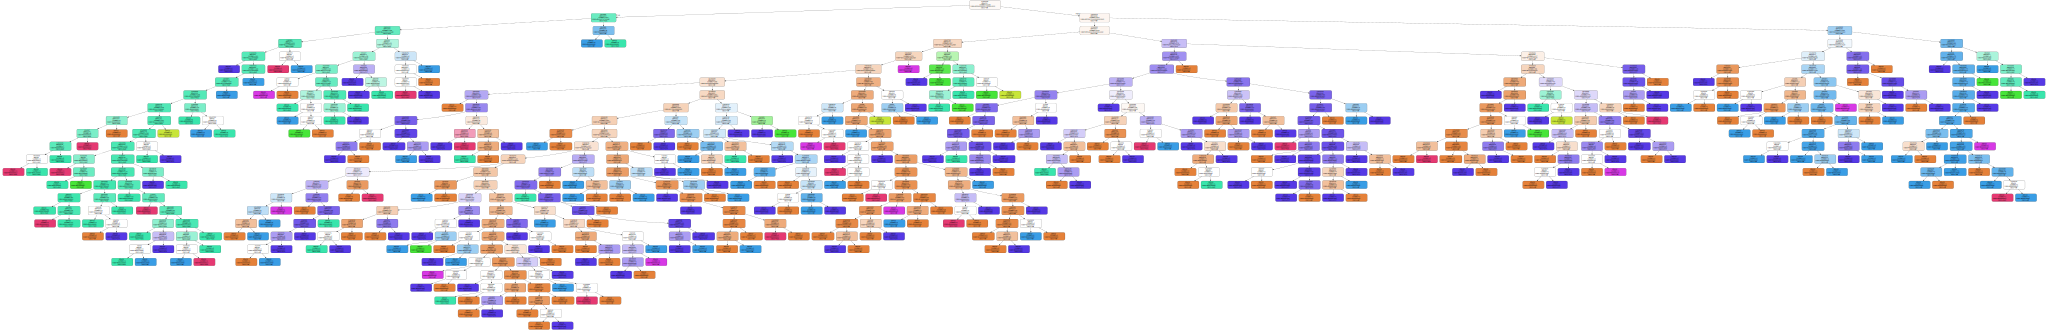

In [82]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
dot_data = tree.export_graphviz(
dt1,
out_file=None,
class_names=y,
filled=True,
rounded=True,
special_characters=True)

graph = graphviz.Source(dot_data)
graph

In [83]:
# Confusion matrix with random forest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
#x,y = df_1.loc[:,df_1.columns != 'TARGET'], df_1.loc[:,'TARGET']

y_pred = dt1.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
%time _ = print('Confusion matrix: \n',cm)
%time _ = print('Classification report: \n',classification_report(y_test,y_pred))

Confusion matrix: 
 [[67  0  2  5 11 44  3  3]
 [ 0  0  0  1  0  0  0  0]
 [ 2  0  7  4  1  1  0  1]
 [ 4  0  3 53  2 11  0  4]
 [17  0  1  6 32 13  2  1]
 [50  0  1 10  7 63  1  1]
 [ 1  0  0  2  0  1  2  0]
 [ 1  0  2  0  0  2  0  1]]
CPU times: user 740 µs, sys: 200 µs, total: 940 µs
Wall time: 871 µs
Classification report: 
               precision    recall  f1-score   support

         CYT       0.47      0.50      0.48       135
         ERL       0.00      0.00      0.00         1
         EXC       0.44      0.44      0.44        16
         ME3       0.65      0.69      0.67        77
         MIT       0.60      0.44      0.51        72
         NUC       0.47      0.47      0.47       133
         POX       0.25      0.33      0.29         6
         VAC       0.09      0.17      0.12         6

   micro avg       0.50      0.50      0.50       446
   macro avg       0.37      0.38      0.37       446
weighted avg       0.51      0.50      0.51       446

CPU times: user 12

/Users/EduardoP/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/EduardoP/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/EduardoP/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


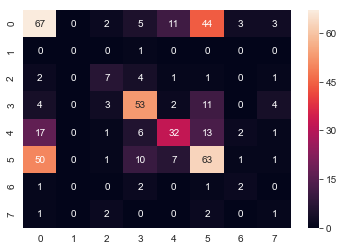

In [84]:
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()


In [85]:
dt1

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [86]:
from sklearn.utils import class_weight
#class_w = class_weight('balanced'np.unique(features), y_train)
dt1 = tree.DecisionTreeClassifier()
dt1.fit(x_train, y_train)
features_imp = dt1.feature_importances_ # [ 1.,  0.,  0.]
score = dt1.score(x_test, y_test) # 1.0
score

0.4977578475336323

In [87]:
y_pred = dt1.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
%time _ = print('Confusion matrix: \n',cm)
%time _ = print('Classification report: \n',classification_report(y_test,y_pred))

Confusion matrix: 
 [[65  0  2  6 12 44  3  3]
 [ 0  0  0  1  0  0  0  0]
 [ 2  0  7  4  1  1  0  1]
 [ 6  0  4 52  3 10  0  2]
 [16  0  1  6 33 13  1  2]
 [49  0  1  8  8 62  1  4]
 [ 1  0  0  2  0  1  2  0]
 [ 1  0  1  1  0  2  0  1]]
CPU times: user 1.81 ms, sys: 482 µs, total: 2.29 ms
Wall time: 2.65 ms
Classification report: 
               precision    recall  f1-score   support

         CYT       0.46      0.48      0.47       135
         ERL       0.00      0.00      0.00         1
         EXC       0.44      0.44      0.44        16
         ME3       0.65      0.68      0.66        77
         MIT       0.58      0.46      0.51        72
         NUC       0.47      0.47      0.47       133
         POX       0.29      0.33      0.31         6
         VAC       0.08      0.17      0.11         6

   micro avg       0.50      0.50      0.50       446
   macro avg       0.37      0.38      0.37       446
weighted avg       0.51      0.50      0.50       446

CPU times: user

/Users/EduardoP/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/EduardoP/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/EduardoP/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [88]:
print(score)
#print(features_imp)

0.4977578475336323


In [89]:
dt1

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [90]:
print("Accuracy for Decision Tree - 1 is:", accuracy_score(y_test,y_pred)*100)

Accuracy for Decision Tree - 1 is: 49.775784753363226


In [91]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

dt2 = tree.DecisionTreeClassifier()

# Choose some parameter combinations to try
parameters = {
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'class_weight': ['balanced',None], 
              'min_samples_split': [2, 3, 4,5],
              'min_samples_leaf': [1,4,5,9]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(dt2, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
dt2 = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dt2.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=9, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [92]:
predictions = dt2.predict(x_test)
print(accuracy_score(y_test, predictions))

0.5538116591928252


In [93]:
print("Accuracy for Decision Tree - 2 is:", accuracy_score(y_test,predictions)*100)

Accuracy for Decision Tree - 2 is: 55.381165919282516


In [94]:
y_pred = dt2.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
%time _ = print('Confusion matrix: \n',cm)
%time _ = print('Classification report: \n',classification_report(y_test,y_pred))

Confusion matrix: 
 [[83  0  0  7 11 34  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 2  0  7  5  2  0  0  0]
 [ 7  0  3 66  0  1  0  0]
 [16  0  1  7 42  6  0  0]
 [61  0  0 10 13 49  0  0]
 [ 2  0  1  2  0  1  0  0]
 [ 0  0  1  3  2  0  0  0]]
CPU times: user 1.02 ms, sys: 173 µs, total: 1.2 ms
Wall time: 1.13 ms
Classification report: 
               precision    recall  f1-score   support

         CYT       0.49      0.61      0.54       135
         ERL       0.00      0.00      0.00         1
         EXC       0.54      0.44      0.48        16
         ME3       0.65      0.86      0.74        77
         MIT       0.60      0.58      0.59        72
         NUC       0.54      0.37      0.44       133
         POX       0.00      0.00      0.00         6
         VAC       0.00      0.00      0.00         6

   micro avg       0.55      0.55      0.55       446
   macro avg       0.35      0.36      0.35       446
weighted avg       0.54      0.55      0.54       446

CPU times: user 

/Users/EduardoP/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/EduardoP/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/EduardoP/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [95]:
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.model_selection import LeavePGroupsOut


def run_kfold(clf):
    
    groups = list(yeast_df['CLASS'])
    logo = LeavePGroupsOut(n_groups=4)
    outcomes = []
    fold = 0

    for train, test in logo.split(x,y, groups=groups):
        fold += 1
        clf.fit(x_train, y_train)
        predictions = clf.predict(x_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))
        #print("%s %s" % (x_test, y_test))
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(clf)

Fold 1 accuracy: 0.5650224215246636
Fold 2 accuracy: 0.5650224215246636
Fold 3 accuracy: 0.5650224215246636
Fold 4 accuracy: 0.5650224215246636
Fold 5 accuracy: 0.5650224215246636
Fold 6 accuracy: 0.5650224215246636
Fold 7 accuracy: 0.5650224215246636
Fold 8 accuracy: 0.5650224215246636
Fold 9 accuracy: 0.5650224215246636
Fold 10 accuracy: 0.5650224215246636
Fold 11 accuracy: 0.5650224215246636
Fold 12 accuracy: 0.5650224215246636
Fold 13 accuracy: 0.5650224215246636
Fold 14 accuracy: 0.5650224215246636
Fold 15 accuracy: 0.5650224215246636
Fold 16 accuracy: 0.5650224215246636
Fold 17 accuracy: 0.5650224215246636
Fold 18 accuracy: 0.5650224215246636
Fold 19 accuracy: 0.5650224215246636
Fold 20 accuracy: 0.5650224215246636
Fold 21 accuracy: 0.5650224215246636
Fold 22 accuracy: 0.5650224215246636
Fold 23 accuracy: 0.5650224215246636
Fold 24 accuracy: 0.5650224215246636
Fold 25 accuracy: 0.5650224215246636
Fold 26 accuracy: 0.5650224215246636
Fold 27 accuracy: 0.5650224215246636
Fold 28 ac

In [96]:

run_kfold(dt1)

Fold 1 accuracy: 0.5
Fold 2 accuracy: 0.5067264573991032
Fold 3 accuracy: 0.5044843049327354
Fold 4 accuracy: 0.48654708520179374
Fold 5 accuracy: 0.5022421524663677
Fold 6 accuracy: 0.4820627802690583
Fold 7 accuracy: 0.48878923766816146
Fold 8 accuracy: 0.5022421524663677
Fold 9 accuracy: 0.5
Fold 10 accuracy: 0.48878923766816146
Fold 11 accuracy: 0.5
Fold 12 accuracy: 0.49551569506726456
Fold 13 accuracy: 0.49551569506726456
Fold 14 accuracy: 0.4910313901345291
Fold 15 accuracy: 0.4977578475336323
Fold 16 accuracy: 0.5
Fold 17 accuracy: 0.4977578475336323
Fold 18 accuracy: 0.49551569506726456
Fold 19 accuracy: 0.48878923766816146
Fold 20 accuracy: 0.4977578475336323
Fold 21 accuracy: 0.5201793721973094
Fold 22 accuracy: 0.5
Fold 23 accuracy: 0.5044843049327354
Fold 24 accuracy: 0.5112107623318386
Fold 25 accuracy: 0.5044843049327354
Fold 26 accuracy: 0.4977578475336323
Fold 27 accuracy: 0.5089686098654709
Fold 28 accuracy: 0.49327354260089684
Fold 29 accuracy: 0.48654708520179374
Fo

In [97]:
print(dt1.get_params(deep=True))

{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}


In [98]:

run_kfold(dt2)

Fold 1 accuracy: 0.5358744394618834
Fold 2 accuracy: 0.5291479820627802
Fold 3 accuracy: 0.5717488789237668
Fold 4 accuracy: 0.5627802690582959
Fold 5 accuracy: 0.5022421524663677
Fold 6 accuracy: 0.5829596412556054
Fold 7 accuracy: 0.5493273542600897
Fold 8 accuracy: 0.5762331838565022
Fold 9 accuracy: 0.5560538116591929
Fold 10 accuracy: 0.5403587443946188
Fold 11 accuracy: 0.5179372197309418
Fold 12 accuracy: 0.5291479820627802
Fold 13 accuracy: 0.5381165919282511
Fold 14 accuracy: 0.5358744394618834
Fold 15 accuracy: 0.5807174887892377
Fold 16 accuracy: 0.5269058295964125
Fold 17 accuracy: 0.5426008968609866
Fold 18 accuracy: 0.5112107623318386
Fold 19 accuracy: 0.5515695067264574
Fold 20 accuracy: 0.5739910313901345
Fold 21 accuracy: 0.5291479820627802
Fold 22 accuracy: 0.5089686098654709
Fold 23 accuracy: 0.5403587443946188
Fold 24 accuracy: 0.5605381165919282
Fold 25 accuracy: 0.5493273542600897
Fold 26 accuracy: 0.5538116591928252
Fold 27 accuracy: 0.5739910313901345
Fold 28 ac

In [99]:
print(dt2.get_params(deep=True))

{'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 9, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}


In [100]:
from sklearn.tree import ExtraTreeClassifier

dt3  = ExtraTreeClassifier()
dt3.fit(x_train, y_train)
predictions = dt3.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy for Decision Tree - 3 is:", accuracy_score(y_test,predictions)*100)

Accuracy for Decision Tree - 3 is: 48.654708520179376


In [101]:
#print(predictions)
predictions = dt3.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy for Decision Tree - 3 is:", accuracy_score(y_test,predictions)*100)


Accuracy for Decision Tree - 3 is: 48.654708520179376


In [102]:

run_kfold(dt3)

Fold 1 accuracy: 0.4910313901345291
Fold 2 accuracy: 0.4327354260089686
Fold 3 accuracy: 0.4551569506726457
Fold 4 accuracy: 0.5022421524663677
Fold 5 accuracy: 0.46860986547085204
Fold 6 accuracy: 0.47085201793721976
Fold 7 accuracy: 0.4730941704035874
Fold 8 accuracy: 0.5044843049327354
Fold 9 accuracy: 0.47533632286995514
Fold 10 accuracy: 0.5089686098654709
Fold 11 accuracy: 0.4484304932735426
Fold 12 accuracy: 0.4461883408071749
Fold 13 accuracy: 0.4663677130044843
Fold 14 accuracy: 0.49551569506726456
Fold 15 accuracy: 0.4798206278026906
Fold 16 accuracy: 0.47757847533632286
Fold 17 accuracy: 0.4618834080717489
Fold 18 accuracy: 0.4551569506726457
Fold 19 accuracy: 0.484304932735426
Fold 20 accuracy: 0.484304932735426
Fold 21 accuracy: 0.4820627802690583
Fold 22 accuracy: 0.5291479820627802
Fold 23 accuracy: 0.4663677130044843
Fold 24 accuracy: 0.4125560538116592
Fold 25 accuracy: 0.45739910313901344
Fold 26 accuracy: 0.4192825112107623
Fold 27 accuracy: 0.4730941704035874
Fold 2

In [103]:
print(dt3.get_params(deep=True))

{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'random'}


In [104]:
dt4  = ExtraTreeClassifier()

# Choose some parameter combinations to try
parameters = {'max_depth':range(3,20),
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'class_weight': ['balanced',None], 
              'min_samples_split': [2, 3, 4,5],
              'min_samples_leaf': [1,4,5,9]
    
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(dt4, parameters, scoring=acc_scorer, n_jobs=-1)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
dt4 = grid_obj.best_estimator_
best_params=grid_obj.best_params_
# Fit the best algorithm to the data. 
%time _  = dt4.fit(x_train, y_train)

CPU times: user 4.9 ms, sys: 288 µs, total: 5.19 ms
Wall time: 5.27 ms


In [105]:
dt4.score(x_test, y_test)


0.5269058295964125

In [106]:
best_score=grid_obj.best_score_
print('The best accuracy score is for Decision Tree 4 is:', best_score)
print('The best parametrs for Decision Tree 4 are:', best_params)


The best accuracy score is for Decision Tree 4 is: 0.5491329479768786
The best parametrs for Decision Tree 4 are: {'class_weight': None, 'criterion': 'gini', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 3}


In [107]:
predictions = dt4.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy for Decision Tree - 4 is:", accuracy_score(y_test,predictions)*100)

Accuracy for Decision Tree - 4 is: 52.690582959641254


In [108]:
dt4.score(x_test, y_test)
#Returns the mean accuracy on the given test data and labels.
#In multi-label classification, this is the subset accuracy 
#which is a harsh metric since you require for 
#each sample that each label set be correctly predicted.

0.5269058295964125

In [109]:

run_kfold(dt4)

Fold 1 accuracy: 0.484304932735426
Fold 2 accuracy: 0.5515695067264574
Fold 3 accuracy: 0.452914798206278
Fold 4 accuracy: 0.547085201793722
Fold 5 accuracy: 0.4618834080717489
Fold 6 accuracy: 0.5201793721973094
Fold 7 accuracy: 0.4551569506726457
Fold 8 accuracy: 0.49327354260089684
Fold 9 accuracy: 0.4663677130044843
Fold 10 accuracy: 0.49327354260089684
Fold 11 accuracy: 0.5560538116591929
Fold 12 accuracy: 0.484304932735426
Fold 13 accuracy: 0.45964125560538116
Fold 14 accuracy: 0.5538116591928252
Fold 15 accuracy: 0.4304932735426009
Fold 16 accuracy: 0.4461883408071749
Fold 17 accuracy: 0.47533632286995514
Fold 18 accuracy: 0.45964125560538116
Fold 19 accuracy: 0.47533632286995514
Fold 20 accuracy: 0.5224215246636771
Fold 21 accuracy: 0.5695067264573991
Fold 22 accuracy: 0.4910313901345291
Fold 23 accuracy: 0.4439461883408072
Fold 24 accuracy: 0.5022421524663677
Fold 25 accuracy: 0.3609865470852018
Fold 26 accuracy: 0.5448430493273543
Fold 27 accuracy: 0.4730941704035874
Fold 28 

In [110]:


dt5 = ExtraTreeClassifier(criterion= 'entropy',
              max_depth= 18,
              max_features= 'log2',
              min_samples_leaf= 4,
              min_samples_split= 3)


# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search

dt5 = dt5.fit(x_train, y_train)
predictions = dt5.predict(x_test)
accuracy = accuracy_score(y_test, predictions)

print(accuracy)


0.57847533632287


In [111]:

run_kfold(dt5)

Fold 1 accuracy: 0.5089686098654709
Fold 2 accuracy: 0.5022421524663677
Fold 3 accuracy: 0.5134529147982063
Fold 4 accuracy: 0.3475336322869955
Fold 5 accuracy: 0.5403587443946188
Fold 6 accuracy: 0.4551569506726457
Fold 7 accuracy: 0.4910313901345291
Fold 8 accuracy: 0.48654708520179374
Fold 9 accuracy: 0.5448430493273543
Fold 10 accuracy: 0.3116591928251121
Fold 11 accuracy: 0.47085201793721976
Fold 12 accuracy: 0.36995515695067266
Fold 13 accuracy: 0.5201793721973094
Fold 14 accuracy: 0.4618834080717489
Fold 15 accuracy: 0.4282511210762332
Fold 16 accuracy: 0.57847533632287
Fold 17 accuracy: 0.5044843049327354
Fold 18 accuracy: 0.5336322869955157
Fold 19 accuracy: 0.3968609865470852
Fold 20 accuracy: 0.48654708520179374
Fold 21 accuracy: 0.4820627802690583
Fold 22 accuracy: 0.4820627802690583
Fold 23 accuracy: 0.5022421524663677
Fold 24 accuracy: 0.547085201793722
Fold 25 accuracy: 0.4551569506726457
Fold 26 accuracy: 0.4977578475336323
Fold 27 accuracy: 0.531390134529148
Fold 28 ac

In [112]:
print(dt5.get_params(deep=True))

{'class_weight': None, 'criterion': 'entropy', 'max_depth': 18, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 4, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'random'}


In [113]:
from sklearn.model_selection import cross_val_score
#Cross-Validation score for SVM with 10-cross-vals
clf = svm.SVC(kernel='linear', C=10)
scores = cross_val_score(clf, x, y, cv=10)
scores

array([0.60927152, 0.63576159, 0.58940397, 0.62666667, 0.65100671,
       0.60544218, 0.53061224, 0.54421769, 0.58219178, 0.63448276])

In [114]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.60 (+/- 0.08)


In [115]:
from sklearn.model_selection import cross_val_score
#Cross-Validation score for SVM with 10-cross-vals
clf = svm.SVC(kernel='linear', C=10)
scores = cross_val_score(clf, x, y, cv=10)
scores

array([0.60927152, 0.63576159, 0.58940397, 0.62666667, 0.65100671,
       0.60544218, 0.53061224, 0.54421769, 0.58219178, 0.63448276])

In [116]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.60 (+/- 0.08)


In [117]:

parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
clf.fit(X=x, y=y)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.5768194070080862 {'max_depth': 6}
